In [1]:
pip install vadersentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import csv
import re
from textblob import TextBlob


In [3]:
news=[]
date=[]

for j in range(1,97):
  webpage=requests.get('https://markets.businessinsider.com/news/amd-stock?p={}&'.format(j)).text
  soup=BeautifulSoup(webpage,'lxml')
  newz2=soup.find_all('div',class_='latest-news__story')

  for i in newz2:
    news.append(i.find('a',class_='news-link').text.strip())
    date.append(i.find('time',class_='latest-news__date')['datetime'])



# final=pd.DataFrame()
df=pd.DataFrame({'Datetime':date,
        'News':news,
    })

df

,Datetime,News
0,6/19/2024 7:31:13 PM,Retire Rich: 3 Powerhouse Stocks to Buy for Lo...
1,6/19/2024 3:00:00 PM,AMD to Power AI-Based Smart Parking Solution f...
2,6/19/2024 10:45:00 AM,7 Stocks With Impressive Earnings Growth: Real...
3,6/19/2024 10:41:00 AM,3 Compelling Chip Stocks to Buy if You Already...
4,6/19/2024 10:15:00 AM,Jim Cramer Has the Hots for AMD Stock. Is This...
...,...,...
4795,7/25/2017 6:18:07 PM,AMD is slipping ahead of earnings (AMD)
4796,7/24/2017 5:52:19 PM,Here's how millennial investors are trading AM...
4797,7/24/2017 3:31:00 PM,InvestorsObserver releases covered-call report...
4798,6/30/2017 4:48:06 PM,A Wall Street bank is betting Nvidia will win ...


In [4]:
#Extracting historical data from yahoo finance
df1=pd.read_csv('AMD-2.csv')
df1_reversed = df1.iloc[::-1].reset_index(drop=True)
df1_reversed

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-06-14,158.500000,161.339996,157.610001,159.630005,159.630005,34013000
1,2024-06-13,160.399994,162.660004,157.309998,159.899994,159.899994,44442500
2,2024-06-12,160.320007,162.240005,158.619995,160.240005,160.240005,48325800
3,2024-06-11,160.500000,161.539993,156.919998,158.960007,158.960007,40497100
4,2024-06-10,162.479996,165.550003,159.610001,160.339996,160.339996,67575600
...,...,...,...,...,...,...,...
1786,2017-05-10,10.460000,10.850000,10.450000,10.790000,10.790000,65995900
1787,2017-05-09,10.040000,10.400000,10.040000,10.180000,10.180000,51017300
1788,2017-05-08,10.220000,10.220000,10.000000,10.040000,10.040000,35101100
1789,2017-05-05,10.130000,10.260000,9.940000,10.190000,10.190000,51759000


In [5]:
#Merging the dataframe df with all the news of the same date

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = df['Datetime'].dt.date
df_grouped = df.groupby('Date')['News'].apply(' '.join).reset_index()
df1_grouped = df_grouped.iloc[::-1].reset_index(drop=True)
df1_grouped

<ipython-input-5-6ffefb5438a4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Datetime'])


,Date,News
0,2024-06-19,Retire Rich: 3 Powerhouse Stocks to Buy for Lo...
1,2024-06-18,Wall Street Favorites: 3 Semiconductor Stocks ...
2,2024-06-17,Rag to Riches: 7 5G Stocks That Could Make Pat...
3,2024-06-16,Is There Any Hope for Lagging AMD Stock? Yes.
4,2024-06-15,7 Must-Have Tech Stocks for Your 2024 Portfolio
...,...,...
1490,2017-07-26,AMD: Cryptocurrency mining won't be a 'long-te...
1491,2017-07-25,AMD Issues Revenue Outlook; Q2 Computing And G...
1492,2017-07-24,Here's how millennial investors are trading AM...
1493,2017-06-30,A Wall Street bank is betting Nvidia will win ...


In [6]:
#CLeaning the data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenize
    words = word_tokenize(text)

    # Convert to lower case
    words = [word.lower() for word in words]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back to string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Apply preprocessing to the news column
df1_grouped['clean_data'] = df1_grouped['News'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
pip install textstat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00


In [8]:
import textstat
# Function to calculate readability score
def readability_score(text):
    return textstat.flesch_reading_ease(text)

# Apply the readability score calculation to the clean_data column
df1_grouped['readability_score'] = df1_grouped['clean_data'].apply(readability_score)

print(df1_grouped)


            Date                                               News  \
0     2024-06-19  Retire Rich: 3 Powerhouse Stocks to Buy for Lo...   
1     2024-06-18  Wall Street Favorites: 3 Semiconductor Stocks ...   
2     2024-06-17  Rag to Riches: 7 5G Stocks That Could Make Pat...   
3     2024-06-16      Is There Any Hope for Lagging AMD Stock? Yes.   
4     2024-06-15    7 Must-Have Tech Stocks for Your 2024 Portfolio   
...          ...                                                ...   
1490  2017-07-26  AMD: Cryptocurrency mining won't be a 'long-te...   
1491  2017-07-25  AMD Issues Revenue Outlook; Q2 Computing And G...   
1492  2017-07-24  Here's how millennial investors are trading AM...   
1493  2017-06-30  A Wall Street bank is betting Nvidia will win ...   
1494  2017-06-26  Covered-Call reports for Advanced Micro Device...   

                                             clean_data  readability_score  
0     retire rich : 3 powerhouse stock buy long-term...              6

In [9]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
#word frequency
def count_words(text):
  words = word_tokenize(text)
  return len(words)

# Apply the count_words function to the clean_data column
df1_grouped['word_count'] = df1_grouped['clean_data'].apply(count_words)

# Print the DataFrame
df1_grouped

,Date,News,clean_data,readability_score,word_count
0,2024-06-19,Retire Rich: 3 Powerhouse Stocks to Buy for Lo...,retire rich : 3 powerhouse stock buy long-term...,63.70,73
1,2024-06-18,Wall Street Favorites: 3 Semiconductor Stocks ...,wall street favorite : 3 semiconductor stock s...,70.13,21
2,2024-06-17,Rag to Riches: 7 5G Stocks That Could Make Pat...,rag rich : 7 5g stock could make patient inves...,29.52,39
3,2024-06-16,Is There Any Hope for Lagging AMD Stock? Yes.,hope lagging amd stock ? yes .,100.24,7
4,2024-06-15,7 Must-Have Tech Stocks for Your 2024 Portfolio,7 must-have tech stock 2024 portfolio,90.77,6
...,...,...,...,...,...
1490,2017-07-26,AMD: Cryptocurrency mining won't be a 'long-te...,amd : cryptocurrency mining wo n't 'long-term ...,75.54,32
1491,2017-07-25,AMD Issues Revenue Outlook; Q2 Computing And G...,amd issue revenue outlook ; q2 computing graph...,51.18,26
1492,2017-07-24,Here's how millennial investors are trading AM...,'s millennial investor trading amd earnings re...,0.42,25
1493,2017-06-30,A Wall Street bank is betting Nvidia will win ...,wall street bank betting nvidia win cryptocurr...,61.33,13


In [11]:
!pip install spacy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
# Load spaCy model
import spacy
nlp = spacy.load('en_core_web_sm')

# Function to calculate the ratio of named entities to total words
def named_entity_ratio(text):
    doc = nlp(text)
    num_entities = len(doc.ents)
    num_words = len(text.split())
    return num_entities / num_words if num_words > 0 else 0

# Apply the named entity ratio calculation to the clean_data column
df1_grouped['entity_ratio'] = df1_grouped['clean_data'].apply(named_entity_ratio)

df1_grouped

,Date,News,clean_data,readability_score,word_count,entity_ratio
0,2024-06-19,Retire Rich: 3 Powerhouse Stocks to Buy for Lo...,retire rich : 3 powerhouse stock buy long-term...,63.70,73,0.095890
1,2024-06-18,Wall Street Favorites: 3 Semiconductor Stocks ...,wall street favorite : 3 semiconductor stock s...,70.13,21,0.095238
2,2024-06-17,Rag to Riches: 7 5G Stocks That Could Make Pat...,rag rich : 7 5g stock could make patient inves...,29.52,39,0.102564
3,2024-06-16,Is There Any Hope for Lagging AMD Stock? Yes.,hope lagging amd stock ? yes .,100.24,7,0.000000
4,2024-06-15,7 Must-Have Tech Stocks for Your 2024 Portfolio,7 must-have tech stock 2024 portfolio,90.77,6,0.166667
...,...,...,...,...,...,...
1490,2017-07-26,AMD: Cryptocurrency mining won't be a 'long-te...,amd : cryptocurrency mining wo n't 'long-term ...,75.54,32,0.062500
1491,2017-07-25,AMD Issues Revenue Outlook; Q2 Computing And G...,amd issue revenue outlook ; q2 computing graph...,51.18,26,0.038462
1492,2017-07-24,Here's how millennial investors are trading AM...,'s millennial investor trading amd earnings re...,0.42,25,0.080000
1493,2017-06-30,A Wall Street bank is betting Nvidia will win ...,wall street bank betting nvidia win cryptocurr...,61.33,13,0.076923


In [13]:
#Subjectivity
def Subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Polarity
def Polarity(text):
  return TextBlob(text).sentiment.polarity

In [14]:
#merge subjectivity and polarity
df1_grouped['Subjectivity'] = df1_grouped['clean_data'].apply(Subjectivity)
df1_grouped['Polarity'] = df1_grouped['clean_data'].apply(Polarity)
df1_grouped


,Date,News,clean_data,readability_score,word_count,entity_ratio,Subjectivity,Polarity
0,2024-06-19,Retire Rich: 3 Powerhouse Stocks to Buy for Lo...,retire rich : 3 powerhouse stock buy long-term...,63.70,73,0.095890,0.705102,0.400510
1,2024-06-18,Wall Street Favorites: 3 Semiconductor Stocks ...,wall street favorite : 3 semiconductor stock s...,70.13,21,0.095238,0.911111,0.477778
2,2024-06-17,Rag to Riches: 7 5G Stocks That Could Make Pat...,rag rich : 7 5g stock could make patient inves...,29.52,39,0.102564,0.682424,0.241061
3,2024-06-16,Is There Any Hope for Lagging AMD Stock? Yes.,hope lagging amd stock ? yes .,100.24,7,0.000000,0.000000,0.000000
4,2024-06-15,7 Must-Have Tech Stocks for Your 2024 Portfolio,7 must-have tech stock 2024 portfolio,90.77,6,0.166667,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1490,2017-07-26,AMD: Cryptocurrency mining won't be a 'long-te...,amd : cryptocurrency mining wo n't 'long-term ...,75.54,32,0.062500,0.000000,0.000000
1491,2017-07-25,AMD Issues Revenue Outlook; Q2 Computing And G...,amd issue revenue outlook ; q2 computing graph...,51.18,26,0.038462,0.250000,-0.050000
1492,2017-07-24,Here's how millennial investors are trading AM...,'s millennial investor trading amd earnings re...,0.42,25,0.080000,0.600000,0.400000
1493,2017-06-30,A Wall Street bank is betting Nvidia will win ...,wall street bank betting nvidia win cryptocurr...,61.33,13,0.076923,0.400000,0.800000


In [15]:
#merging data
df1_reversed['Date']=pd.to_datetime(df1_reversed['Date'])
df1_grouped['Date']=pd.to_datetime(df1_grouped['Date'])
merged_df = df1_reversed.merge(df1_grouped, how='inner', on=['Date'])

In [16]:
#Importing SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#sentiment scores function
def getSIA(text):
  s = SentimentIntensityAnalyzer()
  senti=s.polarity_scores(text)
  return senti

In [17]:
#getting the scores
comp=[]
nega=[]
posi=[]
neut =[]
SIA =0

for i in range(0,len(merged_df['clean_data'])):
  SIA = getSIA(merged_df['clean_data'][i])
  comp.append(SIA['compound'])
  nega.append(SIA['neg'])
  posi.append(SIA['pos'])
  neut.append(SIA['neu'])

In [18]:
#Creating new colums for sentiment scores for analysis
merged_df['Compound']=comp
merged_df['Negative']=nega
merged_df['Positive']=posi
merged_df['Neutral']=neut

merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,News,clean_data,readability_score,word_count,entity_ratio,Subjectivity,Polarity,Compound,Negative,Positive,Neutral
0,2024-06-14,158.500000,161.339996,157.610001,159.630005,159.630005,34013000,The 3 Best Metaverse Stocks to Buy in June 202...,3 best metaverse stock buy june 2024 nvidia ( ...,95.17,23,0.130435,0.275000,0.500000,0.6369,0.000,0.160,0.840
1,2024-06-13,160.399994,162.660004,157.309998,159.899994,159.899994,44442500,3 Stocks Under $10 Set to Quadruple by 2025: J...,3 stock $ 10 set quadruple 2025 : june edition...,43.40,75,0.226667,0.540000,0.590000,0.6369,0.086,0.134,0.780
2,2024-06-12,160.320007,162.240005,158.619995,160.240005,160.240005,48325800,3 Tech Stock Innovators to Own Before They Tak...,3 tech stock innovator take 3 ai stock buy unp...,55.24,16,0.187500,0.900000,0.600000,0.5267,0.000,0.185,0.815
3,2024-06-11,160.500000,161.539993,156.919998,158.960007,158.960007,40497100,Biden Mulls New Restrictions On China's Advanc...,biden mull new restriction china 's advanced a...,49.15,52,0.096154,0.518182,0.345455,0.4404,0.037,0.107,0.856
4,2024-06-10,162.479996,165.550003,159.610001,160.339996,160.339996,67575600,7 Stocks to Pick Up for the Upcoming Interest ...,7 stock pick upcoming interest rate cut amd st...,36.97,114,0.149123,0.568418,0.196229,0.4515,0.071,0.094,0.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,2017-07-26,15.130000,15.650000,14.400000,14.760000,14.760000,236083000,AMD: Cryptocurrency mining won't be a 'long-te...,amd : cryptocurrency mining wo n't 'long-term ...,75.54,32,0.062500,0.000000,0.000000,-0.2924,0.066,0.000,0.934
1312,2017-07-25,14.290000,14.320000,13.870000,14.110000,14.110000,98047400,AMD Issues Revenue Outlook; Q2 Computing And G...,amd issue revenue outlook ; q2 computing graph...,51.18,26,0.038462,0.250000,-0.050000,0.0000,0.000,0.000,1.000
1313,2017-07-24,14.000000,14.440000,13.970000,14.160000,14.160000,71014900,Here's how millennial investors are trading AM...,'s millennial investor trading amd earnings re...,0.42,25,0.080000,0.600000,0.400000,0.2500,0.000,0.077,0.923
1314,2017-06-30,12.570000,12.830000,12.360000,12.480000,12.480000,59267400,A Wall Street bank is betting Nvidia will win ...,wall street bank betting nvidia win cryptocurr...,61.33,13,0.076923,0.400000,0.800000,0.2960,0.149,0.218,0.632


In [19]:
#Adding a label
merged_df['label'] = np.where(merged_df['Open'] > merged_df['Close'], 0, 1)
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,News,clean_data,readability_score,word_count,entity_ratio,Subjectivity,Polarity,Compound,Negative,Positive,Neutral,label
0,2024-06-14,158.500000,161.339996,157.610001,159.630005,159.630005,34013000,The 3 Best Metaverse Stocks to Buy in June 202...,3 best metaverse stock buy june 2024 nvidia ( ...,95.17,23,0.130435,0.275000,0.500000,0.6369,0.000,0.160,0.840,1
1,2024-06-13,160.399994,162.660004,157.309998,159.899994,159.899994,44442500,3 Stocks Under $10 Set to Quadruple by 2025: J...,3 stock $ 10 set quadruple 2025 : june edition...,43.40,75,0.226667,0.540000,0.590000,0.6369,0.086,0.134,0.780,0
2,2024-06-12,160.320007,162.240005,158.619995,160.240005,160.240005,48325800,3 Tech Stock Innovators to Own Before They Tak...,3 tech stock innovator take 3 ai stock buy unp...,55.24,16,0.187500,0.900000,0.600000,0.5267,0.000,0.185,0.815,0
3,2024-06-11,160.500000,161.539993,156.919998,158.960007,158.960007,40497100,Biden Mulls New Restrictions On China's Advanc...,biden mull new restriction china 's advanced a...,49.15,52,0.096154,0.518182,0.345455,0.4404,0.037,0.107,0.856,0
4,2024-06-10,162.479996,165.550003,159.610001,160.339996,160.339996,67575600,7 Stocks to Pick Up for the Upcoming Interest ...,7 stock pick upcoming interest rate cut amd st...,36.97,114,0.149123,0.568418,0.196229,0.4515,0.071,0.094,0.835,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,2017-07-26,15.130000,15.650000,14.400000,14.760000,14.760000,236083000,AMD: Cryptocurrency mining won't be a 'long-te...,amd : cryptocurrency mining wo n't 'long-term ...,75.54,32,0.062500,0.000000,0.000000,-0.2924,0.066,0.000,0.934,0
1312,2017-07-25,14.290000,14.320000,13.870000,14.110000,14.110000,98047400,AMD Issues Revenue Outlook; Q2 Computing And G...,amd issue revenue outlook ; q2 computing graph...,51.18,26,0.038462,0.250000,-0.050000,0.0000,0.000,0.000,1.000,0
1313,2017-07-24,14.000000,14.440000,13.970000,14.160000,14.160000,71014900,Here's how millennial investors are trading AM...,'s millennial investor trading amd earnings re...,0.42,25,0.080000,0.600000,0.400000,0.2500,0.000,0.077,0.923,1
1314,2017-06-30,12.570000,12.830000,12.360000,12.480000,12.480000,59267400,A Wall Street bank is betting Nvidia will win ...,wall street bank betting nvidia win cryptocurr...,61.33,13,0.076923,0.400000,0.800000,0.2960,0.149,0.218,0.632,0


In [20]:
#Model training
final_col=['Open','Volume','Subjectivity','Polarity','entity_ratio','readability_score','Compound','Negative','Positive','Neutral','label']
mod_train=merged_df[final_col]
mod_train

,Open,Volume,Subjectivity,Polarity,entity_ratio,readability_score,Compound,Negative,Positive,Neutral,label
0,158.500000,34013000,0.275000,0.500000,0.130435,95.17,0.6369,0.000,0.160,0.840,1
1,160.399994,44442500,0.540000,0.590000,0.226667,43.40,0.6369,0.086,0.134,0.780,0
2,160.320007,48325800,0.900000,0.600000,0.187500,55.24,0.5267,0.000,0.185,0.815,0
3,160.500000,40497100,0.518182,0.345455,0.096154,49.15,0.4404,0.037,0.107,0.856,0
4,162.479996,67575600,0.568418,0.196229,0.149123,36.97,0.4515,0.071,0.094,0.835,0
...,...,...,...,...,...,...,...,...,...,...,...
1311,15.130000,236083000,0.000000,0.000000,0.062500,75.54,-0.2924,0.066,0.000,0.934,0
1312,14.290000,98047400,0.250000,-0.050000,0.038462,51.18,0.0000,0.000,0.000,1.000,0
1313,14.000000,71014900,0.600000,0.400000,0.080000,0.42,0.2500,0.000,0.077,0.923,1
1314,12.570000,59267400,0.400000,0.800000,0.076923,61.33,0.2960,0.149,0.218,0.632,0


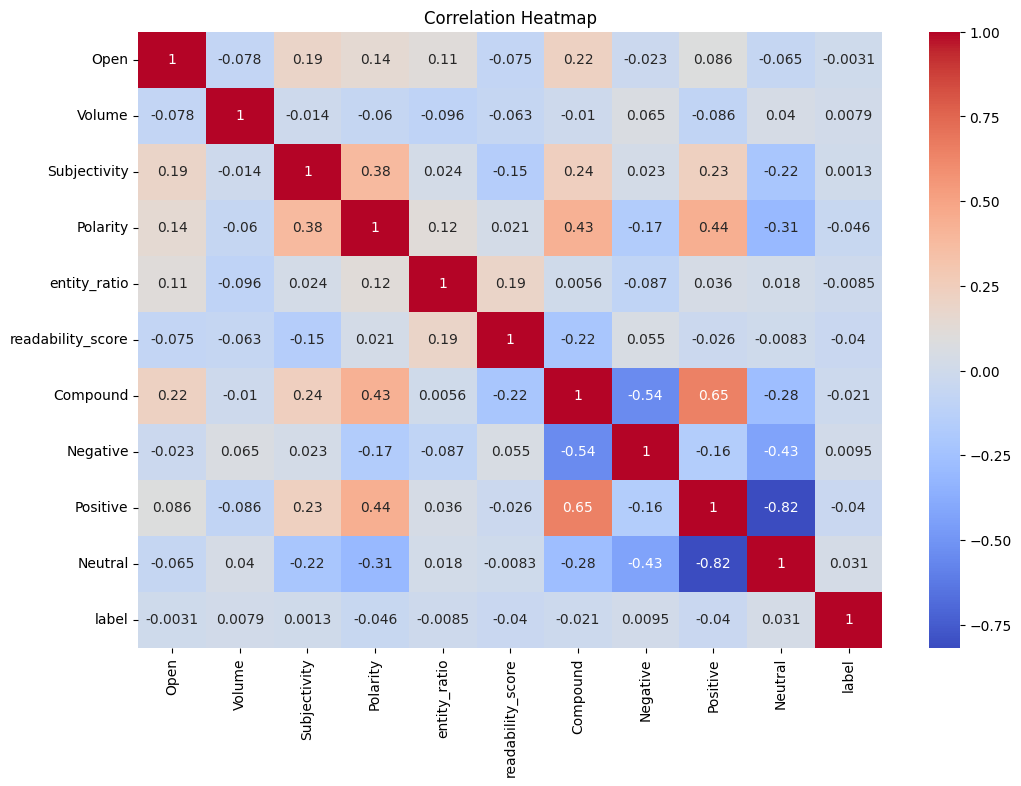

In [21]:
#Correlation heatmap of the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = mod_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

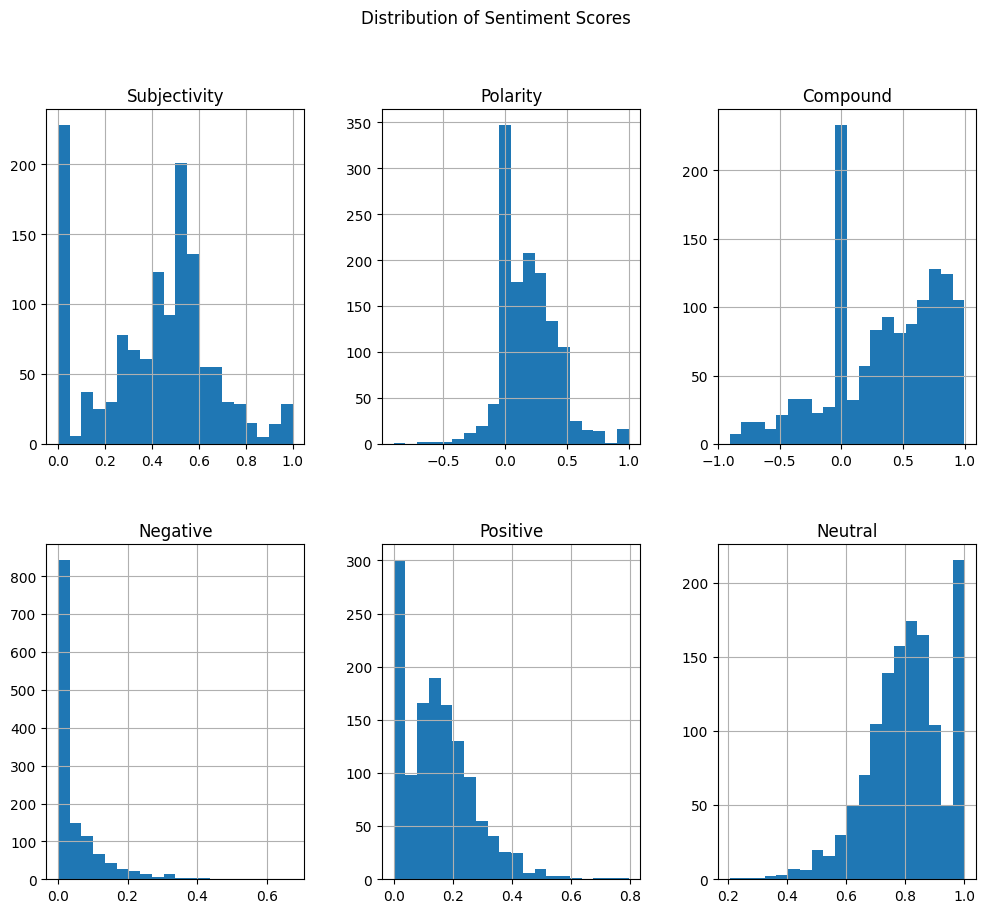

In [22]:
#Histogram
sentiment_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Positive', 'Neutral']
mod_train[sentiment_columns].hist(bins=20, figsize=(12, 10), layout=(2, 3))
plt.suptitle('Distribution of Sentiment Scores')
plt.show()

In [23]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming `X` and `y` are your features and target variable
mod_train8 = mod_train.copy()
X8 = mod_train8.drop('label',axis=1)
y8 = mod_train8['label']
# Split the data
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X8_train_scaled = scaler.fit_transform(X8_train)
X8_test_scaled = scaler.transform(X8_test)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Define the parameter grid for GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['auto', None],
    'n_components': [None, 2, 3, 4]  # Adjust as needed based on your data dimensionality
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit GridSearchCV to the training data
grid_search.fit(X8_train_scaled, y8_train)
# Best estimator from the grid search
best_lda = grid_search.best_estimator_
# Make predictions with the best LDA model
predictions_lda = best_lda.predict(X8_test_scaled)
# Evaluate the best LDA model
accuracy = accuracy_score(y8_test, predictions_lda)
report = classification_report(y8_test, predictions_lda)
print("Best LDA Model Parameters:")
print(best_lda)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)


Best LDA Model Parameters:
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

Accuracy: 0.4734848484848485

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51       140
           1       0.44      0.43      0.43       124

    accuracy                           0.47       264
   macro avg       0.47      0.47      0.47       264
weighted avg       0.47      0.47      0.47       264



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
95 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

---------------------------------------------------------------------------

In [24]:
#SVM model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming `X` and `y` are your features and target variable
mod_train7 = mod_train.copy()
X7 = mod_train7.drop('label',axis=1)
y7 = mod_train7['label']
# Split the data
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X7_train_scaled = scaler.fit_transform(X7_train)
X7_test_scaled = scaler.transform(X7_test)

# Initialize the SVM model
svm = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit GridSearchCV to the training data
grid_search.fit(X7_train_scaled, y7_train)
# Best estimator from the grid search
best_svm = grid_search.best_estimator_
# Make predictions with the best SVM model
predictions_svm = best_svm.predict(X7_test_scaled)
# Evaluate the best SVM model
accuracy = accuracy_score(y7_test, predictions_svm)
report = classification_report(y7_test, predictions_svm)
print("Best SVM Model Parameters:")
print(best_svm)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

Best SVM Model Parameters:
SVC(C=0.1, gamma='auto')

Accuracy: 0.5113636363636364

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.80      0.63       140
           1       0.45      0.19      0.26       124

    accuracy                           0.51       264
   macro avg       0.49      0.49      0.45       264
weighted avg       0.49      0.51      0.46       264



Sharpe Ratio: 0.09286844797199222
Maximum Drawdown: 1.0
Number of Trades Executed: 262
Win Ratio: 0.5076335877862596


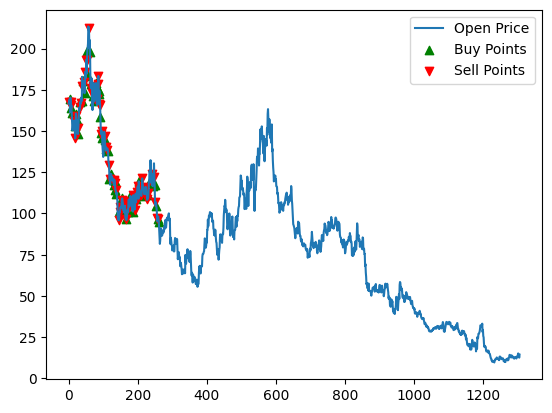

Final Portfolio: 10043.539995999996
Final Returns: 1.0043539995999995


In [26]:
#momentum strategy
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

# Load the data
data9 = merged_df.copy()

# Calculate momentum
momentum_window = 10  # Look-back period for momentum calculation
data9['Momentum'] = data9['Open'].pct_change(momentum_window)

# Drop NaN values
data9.dropna(inplace=True)

# Create the features and target variables
features = ['Open', 'Volume', 'Subjectivity', 'Polarity', 'entity_ratio', 'readability_score', 'Compound', 'Negative', 'Positive', 'Neutral', 'Momentum']
X20 = data9[features]
y20 = data9['label']
# Standardize the features
scaler = StandardScaler()
X20_scaled = scaler.fit_transform(X20)
# Split the data into training and test sets
X20_train, X20_test, y20_train, y20_test = train_test_split(X20_scaled, y20, test_size=0.2, random_state=0)

# Optimize the Gradient Boosting model with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X20_train, y20_train)
# Train the optimized Gradient Boosting model
best_gbc = grid_search.best_estimator_
best_gbc.fit(X20_train, y20_train)
# Make predictions on the test set
predictions = best_gbc.predict(X20_test)
accuracy = accuracy_score(y20_test, predictions)
report = classification_report(y20_test, predictions)

# Calculate the performance metrics
sharpe_ratio = (np.mean(predictions) - np.mean(y20_test)) / np.std(predictions - y20_test)
cumulative_returns = np.cumsum(predictions - y20_test)
max_drawdown = (np.max(cumulative_returns) - np.min(cumulative_returns)) / np.max(cumulative_returns)
num_trades = len(predictions)
win_ratio = np.mean(predictions == y20_test)
# Print the performance metrics
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)
print("Number of Trades Executed:", num_trades)
print("Win Ratio:", win_ratio)
# Devise a trading strategy
buy_points = []
sell_points = []
for i in range(1, len(predictions)):
    if predictions[i] == 1 and predictions[i-1] == 0:
        buy_points.append(i)
    elif predictions[i] == 0 and predictions[i-1] == 1:
        sell_points.append(i)
# Plot the buy and sell points
plt.plot(data9['Open'].values, label='Open Price')
plt.scatter(buy_points, data9['Open'].values[buy_points], color='green', marker='^', label='Buy Points')
plt.scatter(sell_points, data9['Open'].values[sell_points], color='red', marker='v', label='Sell Points')
plt.legend()
plt.show()
# Calculate the final portfolio and returns
initial_portfolio = 10000
final_portfolio = initial_portfolio
for i in range(min(len(buy_points), len(sell_points))):
    final_portfolio += data9['Open'].values[sell_points[i]] - data9['Open'].values[buy_points[i]]
final_returns = final_portfolio / initial_portfolio
print("Final Portfolio:", final_portfolio)
print("Final Returns:", final_returns)
